In [36]:
import pandas as pd
data = pd.read_parquet('yellow_tripdata_2023-03.parquet')
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


In [26]:
data2 = data[['tpep_dropoff_datetime', 'congestion_surcharge']]
data2['tpep_dropoff_datetime'] = data2['tpep_dropoff_datetime'].dt.time
data2.dropna(inplace=True)
data2.head()

C:\Users\roy\AppData\Local\Temp\ipykernel_32664\1182389848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['tpep_dropoff_datetime'] = data2['tpep_dropoff_datetime'].dt.time
C:\Users\roy\AppData\Local\Temp\ipykernel_32664\1182389848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace=True)


,tpep_dropoff_datetime,congestion_surcharge
0,00:16:43,0.0
1,00:39:30,2.5
2,00:29:26,2.5
3,01:01:05,2.5
4,00:11:06,2.5


In [37]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['duration(second)'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'])/pd.Timedelta(seconds=1)
data['tip_percentage'] = data['tip_amount']/data['total_amount']
data = data[['trip_distance', 'passenger_count', 'duration(second)', 'tip_percentage']]
data.dropna(inplace=True)
data = data[data['tip_percentage'] > 0]
data = data.iloc[:1500000]
data.head()

,trip_distance,passenger_count,duration(second),tip_percentage
1,12.40,2.0,1865.0,0.163943
2,3.30,0.0,862.0,0.165775
3,2.90,1.0,688.0,0.165992
4,1.23,1.0,182.0,0.166667
5,1.20,1.0,505.0,0.166667


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = data[['trip_distance', 'passenger_count', 'duration(second)']]
y = data['tip_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}
random_forest_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
predictions = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Best Parameters:", best_params)
print("Random Forest MSE:", mse)
print("Random Forest MSE:", mean_squared_error(y_test, random_forest_model.predict(X_test)))
print("Random Forest MAE:", mean_absolute_error(y_test, random_forest_model.predict(X_test)))

C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

Random Forest MSE: 0.002545525957896545


C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

Random Forest MAE: 0.0358382602752949


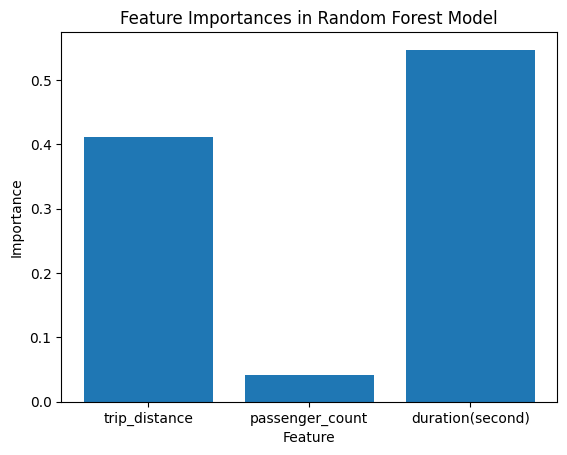

In [8]:
import matplotlib.pyplot as plt
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# Create a bar chart for feature importances
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()

C:\Users\roy\AppData\Local\Temp\ipykernel_32664\200457756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
C:\Users\roy\AppData\Local\Temp\ipykernel_32664\200457756.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['hour'] = data2['tpep_dropoff_datetime'].dt.hour
C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\mo

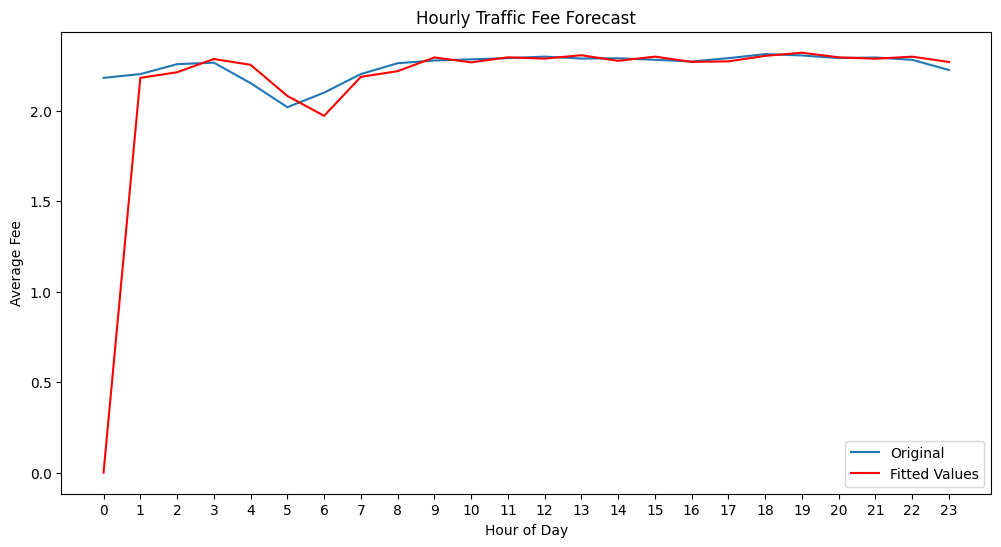

In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data2['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data2['hour'] = data2['tpep_dropoff_datetime'].dt.hour
hourly_fee = data2.groupby('hour')['congestion_surcharge'].mean()
p, d, q = 1, 1, 1 
model = ARIMA(hourly_fee, order=(p, d, q))
model_fit = model.fit()
plt.figure(figsize=(12, 6))
plt.plot(hourly_fee, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.title('Hourly Traffic Fee Forecast')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fee')
plt.xticks(range(0, 24))
plt.legend()
plt.show()


In [34]:
data['tip_amount'].mean

<bound method Series.mean of 0           0.00
1          12.54
2           4.65
3           4.10
4           2.44
           ...  
3316142     3.28
3316143     2.02
3316144     4.12
3316145     2.00
3316146     4.25
Name: tip_amount, Length: 3316147, dtype: float64>